## Dataset
Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. Zalando intends Fashion-MNIST to serve as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

## Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.

Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

The training and test data sets have 785 columns.

The first column consists of the class labels (see above), and represents the article of clothing.

The rest of 784 columns (1-785) contain the pixel-values of the associated image.

-------
There are 10 different classes of images, as following:

0: T-shirt/top;

1: Trouser;

2: Pullover;

3: Dress;

4: Coat;

5: Sandal;

6: Shirt;

7: Sneaker;

8: Bag;

9: Ankle boot.

Image dimmensions are 28x28.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
# Loading the Dataset

In [3]:
df = tf.keras.datasets.fashion_mnist

In [4]:
(x_train,y_train),(x_test,y_test)= df.load_data()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

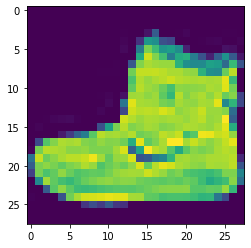

In [6]:
plt.imshow(x_train[0])

In [7]:
y_train[0]

9

In [8]:
# 9 refering to Ankle Boot

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [10]:
class_names[y_train[0]]

'Ankle boot'

In [11]:
# Scaling the Data
## As we will be using gradient descent, need to normalize the data

In [12]:
# one way of doing this as our data is b/w 0-255. (to make it between 0-1, divide by 255.0{ so value float..})
x_train_n = x_train/255.
x_test_n = x_test/255.

In [13]:
x_train_n[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
len(x_train)

60000

In [15]:
len(x_test)

10000

In [16]:
# Dataset Splitting
x_train,x_valid = x_train_n[:55000],x_train_n[55000:]
y_train,y_valid = y_train[:55000],y_train[55000:]
x_test = x_test_n

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

We will use Sequential Model as Simple Neural Network
Input Layer - 28*28
HL1 - ReLu Activation
HL2 - ReLu Activation
Output Layer - Softmax Activation Function (As Multiclass Classification)
Output - 1 in 10 Categories

In [18]:
# Creating Object Model
model = tf.keras.models.Sequential()
# Input Layer - Converting 2D array to a 1D array
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
# Hidden Layer 1 - {relu is 0 for all -ve no.s and that input for all positive inputs}
model.add(tf.keras.layers.Dense(300,activation='relu'))
# Hidden Layer 2 (with less neurons)
model.add(tf.keras.layers.Dense(100,activation='relu'))
# Output Layer {softmax - sums up each class probability to 1}
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [19]:
# Looking at the model (Displaying all the layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
# None - Batch Size of Input (Since Passing All of the data it is None which means no limit on Input Data)
# Param - No. of trainable Paramters in that layer
# 784*300(W)   + 300(B) = 235500
# 300*100(W)   + 100(B) = 30100

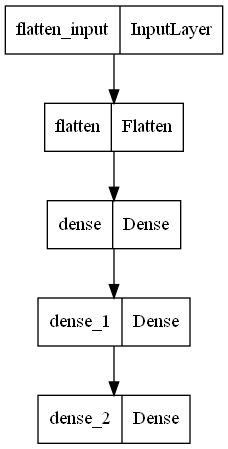

In [21]:
# To view the Neural Network
# pip install pydot
# pip install pydotplus
# pip install graphviz
tf.keras.utils.plot_model(model)

In [22]:
# We can access the paramters using get_weight() method
# Weights are assigned randomly at the time of initialization
weights, biases = model.layers[1].get_weights()

In [23]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

In [27]:
# Compiling our model
# sparse_categorical_crossentropy brcause y in form of labels of 10 defferent items
# if probabilities of class variable we would have used categorical_crossentropy
# if we had binary labels then we would have used binary_crossentropy
# sgd - stochastic gradient descent (telling tf to perorm backporpogatrion)
# Classification -> accuracy - the metric which will evaluate our model
# Regression -> mse metric
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',metrics=['accuracy'])

In [28]:
model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.7221 - accuracy: 0.7649 - val_loss: 0.4960 - val_accuracy: 0.8332
Epoch 2/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4826 - accuracy: 0.8329 - val_loss: 0.4560 - val_accuracy: 0.8386
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4370 - accuracy: 0.8479 - val_loss: 0.4232 - val_accuracy: 0.8546
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4120 - accuracy: 0.8561 - val_loss: 0.3971 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3909 - accuracy: 0.8633 - val_loss: 0.3891 - val_accuracy: 0.8616
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3750 - accuracy: 0.8691 - val_loss: 0.3903 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3628 - accuracy: 0.8710 - val_loss: 0.3708 - val_accuracy:

In [30]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
model.history.history

{'loss': [0.7220508456230164,
  0.48263484239578247,
  0.43698835372924805,
  0.41201990842819214,
  0.3908969759941101,
  0.37498775124549866,
  0.36282676458358765,
  0.3511525094509125,
  0.34035223722457886,
  0.33063870668411255,
  0.32222744822502136,
  0.3144293427467346,
  0.3070748448371887,
  0.30036818981170654,
  0.2936505079269409,
  0.2869778573513031,
  0.2822602391242981,
  0.2757260799407959,
  0.27109792828559875,
  0.2663816511631012,
  0.2611413598060608,
  0.2564109265804291,
  0.252010315656662,
  0.2469930797815323,
  0.24283796548843384,
  0.23918533325195312,
  0.23400269448757172,
  0.2311517745256424,
  0.22681014239788055,
  0.2236650586128235],
 'accuracy': [0.7649272680282593,
  0.8329272866249084,
  0.8479272723197937,
  0.8560909032821655,
  0.8633272647857666,
  0.8690727353096008,
  0.8709818124771118,
  0.8753818273544312,
  0.8790545463562012,
  0.881781816482544,
  0.8857272863388062,
  0.8867818117141724,
  0.8902727365493774,
  0.8920727372169495,

<AxesSubplot:>

<Figure size 864x576 with 0 Axes>

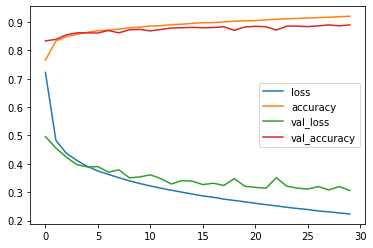

In [34]:
plt.figure(figsize=(12,8))
pd.DataFrame(model.history.history).plot()

In [35]:
# We can se val_accuracy still going up and val_loss still going down
# So the model has not converged yet, so should run for more epochs
# if we dont compile and only fit again tf will run this model for next 30 more epochs

In [36]:
# Evaluating our Model
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3250 - accuracy: 0.8847


[0.32496100664138794, 0.8847000002861023]

In [37]:
# Accuracy of 88.4% with ANN

In [38]:
X_new = x_test[:3]

In [39]:
# To predict Probabilities
y_proba = model.predict(X_new)

In [40]:
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
# 1st Record - 97%
# 2nd Record - 99%
# 3rd Record - 100%

In [42]:
# To predict the class
y_pred=np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


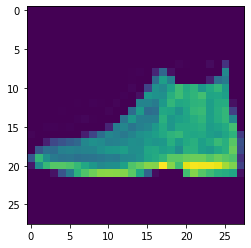

In [44]:
print(plt.imshow(X_new[0]))

AxesImage(54,36;334.8x217.44)


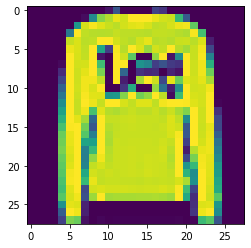

In [45]:
print(plt.imshow(X_new[1]))

AxesImage(54,36;334.8x217.44)


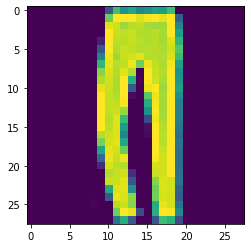

In [46]:
print(plt.imshow(X_new[2]))

## Thankyou